In [1]:
import utils
import networks
from plot_utils import plot_summary

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as datasets
from torch.utils.data import DataLoader, WeightedRandomSampler

In [2]:
train_set = datasets.ImageFolder(root=utils.dirs['train'], transform=utils.transform['train'])
val_set = datasets.ImageFolder(root=utils.dirs['val'], transform=utils.transform['val'])

In [3]:
class_freq = torch.as_tensor(train_set.targets).bincount()
weight = 1 / class_freq
samples_weight = weight[train_set.targets]
sampler = WeightedRandomSampler(samples_weight, len(samples_weight), replacement=True)

train_dl = DataLoader(train_set, batch_size=32, sampler=sampler, num_workers=2, worker_init_fn=utils.wif)
valid_dl = DataLoader(val_set, batch_size=40)

In [4]:
epochs = 15
criterion = nn.CrossEntropyLoss()

In [5]:
vgg16 = networks.get_vgg16(pretrained=True, out_features=4)

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


In [6]:
utils.fit(
    epochs=epochs,
    model=vgg16,
    criterion=criterion,
    optimizer=optim.Adam(vgg16.parameters(), lr=3e-5),
    train_dl=train_dl,
    valid_dl=valid_dl
)

Epoch [ 1/15]: 100%|██████████| 657/657 [05:23<00:00,  2.03it/s, acc=0.906, loss=0.0023]



		Avg train loss: 0.255749	Avg valid loss: 0.048611

		valid_loss decreased (inf -> 0.048611)
		saving model...



Epoch [ 2/15]: 100%|██████████| 657/657 [05:39<00:00,  1.93it/s, acc=0.959, loss=0.00792]



		Avg train loss: 0.118382	Avg valid loss: 0.042556

		valid_loss decreased (0.048611 -> 0.042556)
		saving model...



Epoch [ 3/15]: 100%|██████████| 657/657 [05:40<00:00,  1.93it/s, acc=0.965, loss=0.00859]



		Avg train loss: 0.097360	Avg valid loss: 0.029283

		valid_loss decreased (0.042556 -> 0.029283)
		saving model...



Epoch [ 4/15]: 100%|██████████| 657/657 [05:40<00:00,  1.93it/s, acc=0.973, loss=0.00802]



		Avg train loss: 0.077337	Avg valid loss: 0.045282



Epoch [ 5/15]: 100%|██████████| 657/657 [05:40<00:00,  1.93it/s, acc=0.975, loss=0.086]



		Avg train loss: 0.072999	Avg valid loss: 0.034813



Epoch [ 6/15]: 100%|██████████| 657/657 [05:40<00:00,  1.93it/s, acc=0.978, loss=0.00252]



		Avg train loss: 0.063818	Avg valid loss: 0.048239



Epoch [ 7/15]: 100%|██████████| 657/657 [05:39<00:00,  1.93it/s, acc=0.98, loss=0.0129]



		Avg train loss: 0.053751	Avg valid loss: 0.025886

		valid_loss decreased (0.029283 -> 0.025886)
		saving model...



Epoch [ 8/15]: 100%|██████████| 657/657 [05:39<00:00,  1.93it/s, acc=0.983, loss=0.0208]



		Avg train loss: 0.048574	Avg valid loss: 0.024360

		valid_loss decreased (0.025886 -> 0.024360)
		saving model...



Epoch [ 9/15]: 100%|██████████| 657/657 [05:39<00:00,  1.93it/s, acc=0.986, loss=0.00788]



		Avg train loss: 0.040675	Avg valid loss: 0.011793

		valid_loss decreased (0.024360 -> 0.011793)
		saving model...



Epoch [10/15]: 100%|██████████| 657/657 [05:40<00:00,  1.93it/s, acc=0.987, loss=0.03]



		Avg train loss: 0.039429	Avg valid loss: 0.032189



Epoch [11/15]: 100%|██████████| 657/657 [05:39<00:00,  1.93it/s, acc=0.988, loss=0.0281]



		Avg train loss: 0.036186	Avg valid loss: 0.009234

		valid_loss decreased (0.011793 -> 0.009234)
		saving model...



Epoch [12/15]: 100%|██████████| 657/657 [05:39<00:00,  1.94it/s, acc=0.991, loss=0.00212]



		Avg train loss: 0.028152	Avg valid loss: 0.021888



Epoch [13/15]: 100%|██████████| 657/657 [05:39<00:00,  1.93it/s, acc=0.991, loss=0.000217]



		Avg train loss: 0.029274	Avg valid loss: 0.008455

		valid_loss decreased (0.009234 -> 0.008455)
		saving model...



Epoch [14/15]: 100%|██████████| 657/657 [05:39<00:00,  1.94it/s, acc=0.991, loss=0.00219]



		Avg train loss: 0.028827	Avg valid loss: 0.027854



Epoch [15/15]: 100%|██████████| 657/657 [05:39<00:00,  1.93it/s, acc=0.993, loss=9.16e-5]



		Avg train loss: 0.020973	Avg valid loss: 0.018448



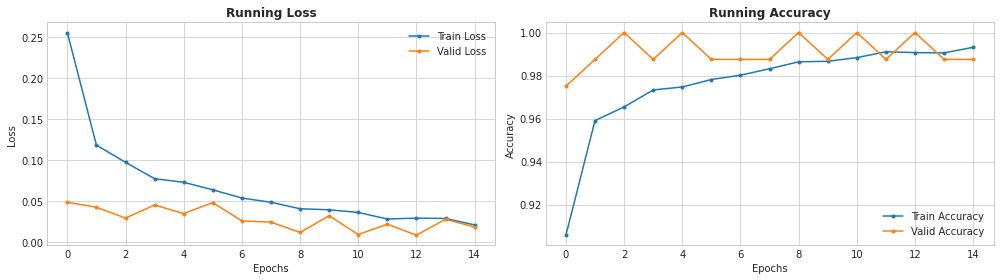

In [7]:
plot_summary('outputs/CSVs/vgg.csv')

In [8]:
resnet18 = networks.get_resnet18(pretrained=True, out_features=4)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


In [9]:
utils.fit(
    epochs=epochs,
    model=resnet18,
    criterion=criterion,
    optimizer=optim.Adam(resnet18.parameters(), lr=3e-5),
    train_dl=train_dl,
    valid_dl=valid_dl
)

Epoch [ 1/15]: 100%|██████████| 657/657 [01:31<00:00,  7.15it/s, acc=0.914, loss=0.123]



		Avg train loss: 0.244047	Avg valid loss: 0.079467

		valid_loss decreased (inf -> 0.079467)
		saving model...



Epoch [ 2/15]: 100%|██████████| 657/657 [01:31<00:00,  7.22it/s, acc=0.961, loss=0.00343]



		Avg train loss: 0.112250	Avg valid loss: 0.063980

		valid_loss decreased (0.079467 -> 0.063980)
		saving model...



Epoch [ 3/15]: 100%|██████████| 657/657 [01:31<00:00,  7.20it/s, acc=0.969, loss=0.023]



		Avg train loss: 0.088909	Avg valid loss: 0.059052

		valid_loss decreased (0.063980 -> 0.059052)
		saving model...



Epoch [ 4/15]: 100%|██████████| 657/657 [01:35<00:00,  6.89it/s, acc=0.975, loss=0.102]



		Avg train loss: 0.069555	Avg valid loss: 0.071787



Epoch [ 5/15]: 100%|██████████| 657/657 [01:32<00:00,  7.13it/s, acc=0.983, loss=0.0116]



		Avg train loss: 0.054808	Avg valid loss: 0.042883

		valid_loss decreased (0.059052 -> 0.042883)
		saving model...



Epoch [ 6/15]: 100%|██████████| 657/657 [01:32<00:00,  7.12it/s, acc=0.985, loss=0.0205]



		Avg train loss: 0.046883	Avg valid loss: 0.064281



Epoch [ 7/15]: 100%|██████████| 657/657 [01:32<00:00,  7.13it/s, acc=0.988, loss=0.19]



		Avg train loss: 0.038470	Avg valid loss: 0.070975



Epoch [ 8/15]: 100%|██████████| 657/657 [01:32<00:00,  7.12it/s, acc=0.989, loss=0.0652]



		Avg train loss: 0.033845	Avg valid loss: 0.019293

		valid_loss decreased (0.042883 -> 0.019293)
		saving model...



Epoch [ 9/15]: 100%|██████████| 657/657 [01:32<00:00,  7.12it/s, acc=0.991, loss=0.0474]



		Avg train loss: 0.026869	Avg valid loss: 0.020838



Epoch [10/15]: 100%|██████████| 657/657 [01:32<00:00,  7.10it/s, acc=0.991, loss=0.0129]



		Avg train loss: 0.026900	Avg valid loss: 0.036035



Epoch [11/15]: 100%|██████████| 657/657 [01:32<00:00,  7.09it/s, acc=0.994, loss=0.000455]



		Avg train loss: 0.020515	Avg valid loss: 0.018541

		valid_loss decreased (0.019293 -> 0.018541)
		saving model...



Epoch [12/15]: 100%|██████████| 657/657 [01:33<00:00,  7.04it/s, acc=0.994, loss=0.0217]



		Avg train loss: 0.018105	Avg valid loss: 0.047103



Epoch [13/15]: 100%|██████████| 657/657 [01:32<00:00,  7.10it/s, acc=0.995, loss=0.0471]



		Avg train loss: 0.015677	Avg valid loss: 0.017938

		valid_loss decreased (0.018541 -> 0.017938)
		saving model...



Epoch [14/15]: 100%|██████████| 657/657 [01:33<00:00,  7.06it/s, acc=0.996, loss=0.0136]



		Avg train loss: 0.013598	Avg valid loss: 0.134736



Epoch [15/15]: 100%|██████████| 657/657 [01:33<00:00,  7.04it/s, acc=0.994, loss=0.00201]



		Avg train loss: 0.016365	Avg valid loss: 0.020682



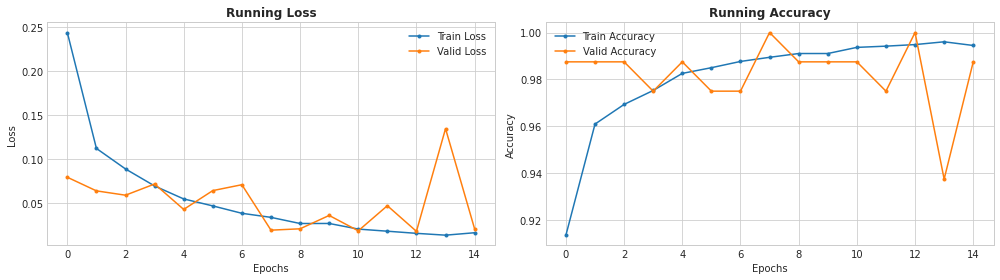

In [10]:
plot_summary('outputs/CSVs/resnet.csv')

In [11]:
densenet121 = networks.get_densenet121(pretrained=True, out_features=4)

Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth


In [12]:
utils.fit(
    epochs=epochs,
    model=densenet121,
    criterion=criterion,
    optimizer=optim.Adam(densenet121.parameters(), lr=3e-5),
    train_dl=train_dl,
    valid_dl=valid_dl
)

Epoch [ 1/15]: 100%|██████████| 657/657 [04:03<00:00,  2.70it/s, acc=0.905, loss=0.153]



		Avg train loss: 0.286987	Avg valid loss: 0.068573

		valid_loss decreased (inf -> 0.068573)
		saving model...



Epoch [ 2/15]: 100%|██████████| 657/657 [04:03<00:00,  2.70it/s, acc=0.96, loss=0.174]



		Avg train loss: 0.121936	Avg valid loss: 0.041026

		valid_loss decreased (0.068573 -> 0.041026)
		saving model...



Epoch [ 3/15]: 100%|██████████| 657/657 [04:03<00:00,  2.70it/s, acc=0.969, loss=0.114]



		Avg train loss: 0.091854	Avg valid loss: 0.023349

		valid_loss decreased (0.041026 -> 0.023349)
		saving model...



Epoch [ 4/15]: 100%|██████████| 657/657 [04:03<00:00,  2.70it/s, acc=0.976, loss=0.042]



		Avg train loss: 0.072923	Avg valid loss: 0.050998



Epoch [ 5/15]: 100%|██████████| 657/657 [04:03<00:00,  2.70it/s, acc=0.979, loss=0.0148]



		Avg train loss: 0.059002	Avg valid loss: 0.031071



Epoch [ 6/15]: 100%|██████████| 657/657 [04:03<00:00,  2.70it/s, acc=0.984, loss=0.0231]



		Avg train loss: 0.051435	Avg valid loss: 0.017686

		valid_loss decreased (0.023349 -> 0.017686)
		saving model...



Epoch [ 7/15]: 100%|██████████| 657/657 [04:03<00:00,  2.70it/s, acc=0.988, loss=0.237]



		Avg train loss: 0.039400	Avg valid loss: 0.036317



Epoch [ 8/15]: 100%|██████████| 657/657 [04:03<00:00,  2.70it/s, acc=0.989, loss=0.00534]



		Avg train loss: 0.034346	Avg valid loss: 0.038673



Epoch [ 9/15]: 100%|██████████| 657/657 [04:03<00:00,  2.70it/s, acc=0.992, loss=0.00395]



		Avg train loss: 0.027598	Avg valid loss: 0.033738



Epoch [10/15]: 100%|██████████| 657/657 [04:03<00:00,  2.70it/s, acc=0.992, loss=0.323]



		Avg train loss: 0.023704	Avg valid loss: 0.017631

		valid_loss decreased (0.017686 -> 0.017631)
		saving model...



Epoch [11/15]: 100%|██████████| 657/657 [04:04<00:00,  2.69it/s, acc=0.993, loss=0.000343]



		Avg train loss: 0.021821	Avg valid loss: 0.016956

		valid_loss decreased (0.017631 -> 0.016956)
		saving model...



Epoch [12/15]: 100%|██████████| 657/657 [04:04<00:00,  2.68it/s, acc=0.993, loss=0.0223]



		Avg train loss: 0.022176	Avg valid loss: 0.088792



Epoch [13/15]: 100%|██████████| 657/657 [04:05<00:00,  2.68it/s, acc=0.995, loss=0.00216]



		Avg train loss: 0.016109	Avg valid loss: 0.041584



Epoch [14/15]: 100%|██████████| 657/657 [04:05<00:00,  2.67it/s, acc=0.995, loss=0.0106]



		Avg train loss: 0.015966	Avg valid loss: 0.064276



Epoch [15/15]: 100%|██████████| 657/657 [04:06<00:00,  2.66it/s, acc=0.995, loss=0.0028]



		Avg train loss: 0.013991	Avg valid loss: 0.040584



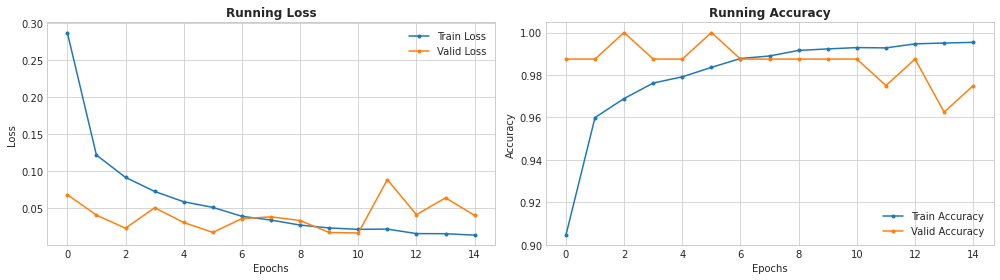

In [13]:
plot_summary('outputs/CSVs/densenet.csv')